In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basic solow growth model with variables:

### Inputs
1. labour force growth rate (proportional)
2. labour force efficiency growth rate  (proportional)
3. propensity to save 
4. capital depreciation rate
5. elasticity of production with respect to capital 
6. initial labour
7. initial efficiency
8. initial capital intensity
9. Simulation time 

### Outputs
1. Size of labour force (L)
2. Labour efficiency (E)
3. Capital intensity (κ)
4. Production (Y) 
5. Capital (K) 
6. output per worker (y) 

### Agents: 
1. households (linked to size of labour force L)
2. firms (linked to capital?)
3. banks (linked to .... savings?)
4. LSP (linked to banks?)
5. central bank 


### transaction types: 
- B - Banknotes (household / firms)
- D - Deposits (household / firms)
- L - Loans and Bonds (firms / banks)
- R - Reserves (share of deposits?)
- C - CBDC (?)
- M - Open Market Operations (share of deposits?)

### Inputs

In [2]:
labour_growth = 0.01 # the labor-force L proportional growth rate (n)
efficiency_growth = 0.02 # the labor-efficiency E proportional growth rate (g)
savings_rate = 0.12 # the share of production Y that is saved and invested (s)
depreciation_rate = 0.03 # the capital depreciation rate (δ)
production_elasticity = 1.09 # the elasticitiy of production Y with respect to capital θ
labour_0 = 1 # labour force T=0 (L_0)
efficiency_0 = 1 # labour efficiency T=0 (E_0)
capital_0 = 8 # capital at T=0 (κ_0)
time = 300 # simulation time

## Initialise:

In [3]:
# initialize the dataframe:
solow_df = pd.DataFrame()
labour = [labour_0]
labour_efficiency = [efficiency_0]
capital_intensity = [capital_0]
production = []
capital = []
output_per_worker = []

### Simulation

In [4]:
# determine labour force size, labour efficiency, and capital intensity over time
for t in range(time):
    labour = labour + [labour[t]*np.exp(labour_growth)]
    labour_efficiency = labour_efficiency + [labour_efficiency[t]*np.exp(efficiency_growth)]
    capital_intensity = capital_intensity + [capital_intensity[t] * (1 + (savings_rate/capital_intensity[t] - (labour_growth+efficiency_growth+depreciation_rate))/(1+production_elasticity))]

# determine production, capital, and output per worker    
for t in range(time+1):
    production = production + [(capital_intensity[t]**production_elasticity)*labour[t]*labour_efficiency[t]]
    capital = capital + [(capital_intensity[t]*production[t])]
    output_per_worker = output_per_worker + [production[t]/labour[t]]

In [5]:
solow_df['labour'] = labour
solow_df['labour_efficiency'] = labour_efficiency
solow_df['capital_intensity'] = capital_intensity
solow_df['production'] = production
solow_df['capital'] = capital
solow_df['output_per_worker'] = output_per_worker

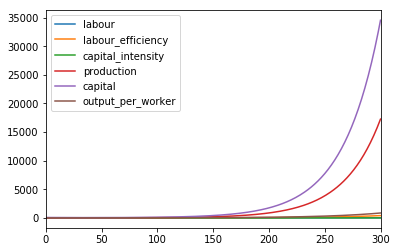

In [6]:
solow_df.plot()

### Output: 

In [28]:
solow_df.to_csv('solow_output.csv', sep=';')